In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('Data/combinedclimatedata.csv')

In [3]:
# Let X be world population and y be global average yearly temperature, then Reshape X and y
X = dataset['population_millions'].values.reshape(-1,1)
y = dataset['LandAndOceanAverageTemperature'].values.reshape(-1,1)

In [4]:
# split the train - test data to be 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Train the algorithm using a linear regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#To retrieve the intercept:
print("The y intercept is:  ", regressor.intercept_)
#For retrieving the slope:
print("The slope is:  ", regressor.coef_)

The y intercept is:   [14.35225079]
The slope is:   [[2.1729278e-07]]


In [7]:
# Make predictions
y_pred = regressor.predict(X_test)

In [8]:
# Compare actual to predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), "Error": y_pred.flatten() - y_test.flatten()})
# pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]
df

,Actual,Predicted,Error
0,15.757250,15.756214,-0.001036
1,15.826583,15.738836,-0.087747
2,15.913000,15.937465,0.024465
3,15.827333,15.809405,-0.017929
4,15.854417,15.919058,0.064642


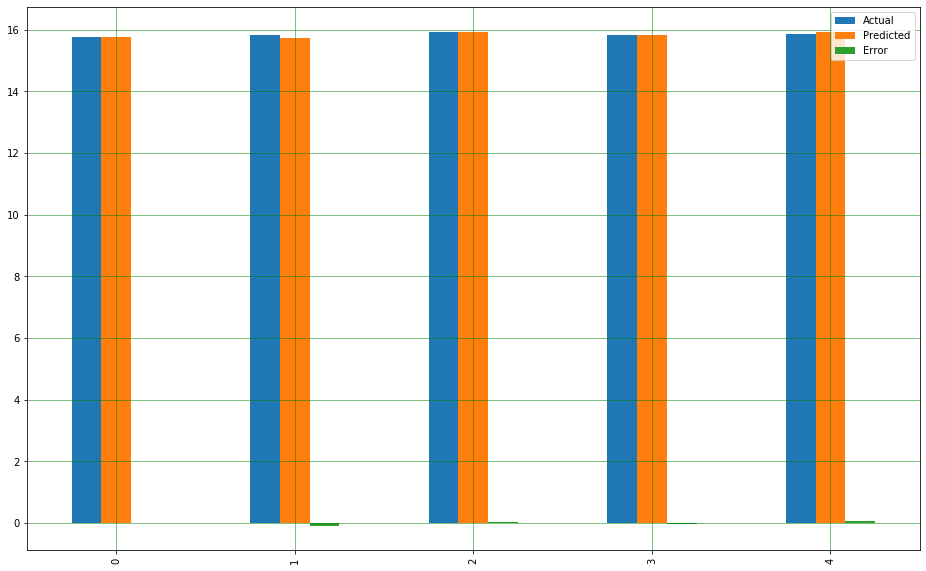

In [9]:
# Create a bar chart to show comparison between actual and predicted
df1 = df.head(23)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

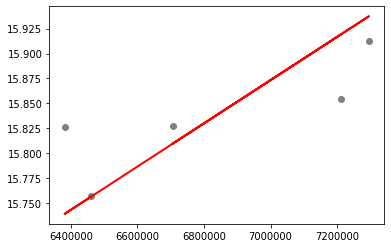

In [10]:
# Plot our straight line with the test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [11]:
# Calculate margin or error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.039163620922685285
Mean Squared Error: 0.002559823884416783
Root Mean Squared Error: 0.050594702137840314


In [12]:
x_min = X.min()
x_max = X.max()
print("Min/Max X values (Population)", x_min, x_max)

Min/Max X values (Population) 5581597.597999998 7379796.967


In [13]:
# Get y (temperature min and max actuals)
y_min_actual = y.min()
y_max_actual = y.max()
print("Min/Max Y values (Temperature)", y_min_actual, y_max_actual)

Min/Max Y values (Temperature) 15.466416666666667 16.058583333333335


In [14]:
#The y intercept is:   [14.35225079]
#The slope is:   [[2.1729278e-07]]
y_min = 14.35225079 + 2.1729278e-07 * x_min
y_max = 14.35225079 + 2.1729278e-07 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 15.466416666666667
Calculated Min Value: 15.565091648910741
Actual Max Value: 16.058583333333335
Calculated Max Value: 15.955827388794997


In [15]:
# Predict calculated values
y_min_predicted = regressor.predict([[x_min]])
y_max_predicted = regressor.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 15.466416666666667
Predicted Min Value: [[15.56509165]]
Actual Max Value: 16.058583333333335
Predicted Max Value: [[15.95582739]]


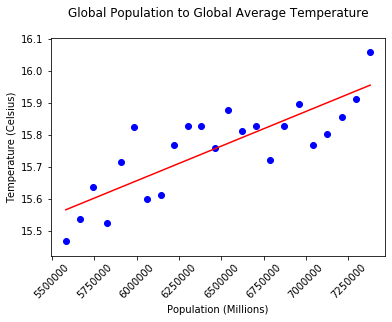

In [20]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')
plt.xticks(rotation=45)
plt.xlabel("Population (Millions)")
plt.ylabel("Temperature (Celsius)")
plt.title("Global Population to Global Average Temperature\n")
fig1 = plt.gcf()
fig1.savefig('images/pop_to_temp.png', bbox_inches='tight')

### Plugging in the Numbers:
#### Average Global Temperature = slope * Population + y-intercept
#### slope = 2.1729278e-07
#### y-intercept = 14.35225079
#### Global Temp. Above 1.5 degrees C from 1850 average global temperature = 16.37
#### Population = 16.37 - (14.35225079))/2.1729278e-07
#### Population = 9285854 or 9,285,854,000